In [5]:
X = list(range(10))
Y = [1, 1, 2, 4, 5, 7, 8, 9, 9, 10]
print(len(X))
print(len(Y))

10
10


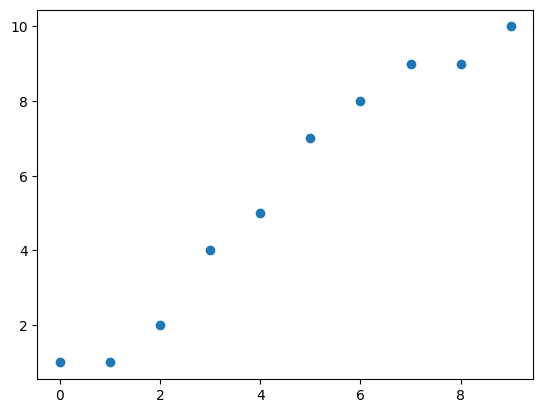

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)

In [26]:
class H():   #Hypothesis
    def __init__(self, w):
        self.w = w

    def forward(self, x):
        return self.w*x

def cost(h, X, Y):
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i]) - Y[i])**2
    error = error / len(X)
    return error

h = H(4)
cost(h, X, Y)

222.2

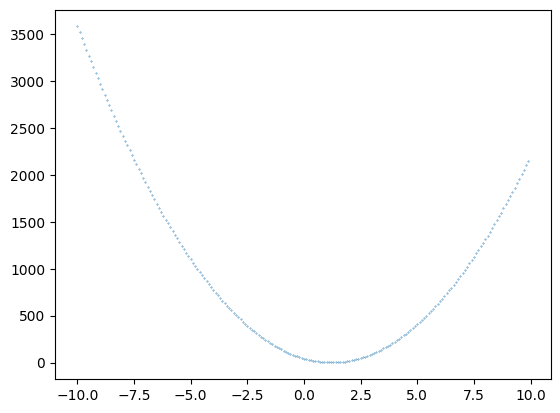

In [27]:
list_w = []
list_c = []
for i in range(-100, 100):
    w = i * 0.1
    h = H(w)
    c = cost(h, X, Y)

    list_w.append(w)
    list_c.append(c)

plt.scatter(list_w,list_c, s=0.1)

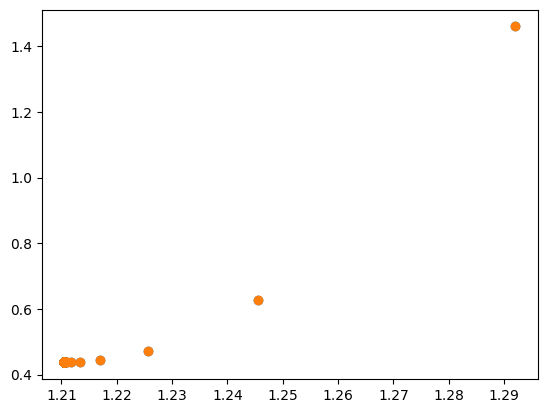

In [41]:
def cal_grad(w, cost):
    h1 = H(w)
    cost1 = cost(h1, X, Y)

    eps = 0.00001
    h2 = H(w+eps)
    cost2 = cost(h2, X, Y)

    dcost = cost2 - cost1
    dw = eps
    grad = dcost/dw
    return grad, (cost1+cost2)*0.5

def cal_grad2(w, cost):
    h = H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2 * (h.forward(X[i]) - Y[i]) * X[i]
    grad = grad / len(X)
    c = cost(h, X, Y)
    return grad, c

w1 = 1.4
w2 = 1.4
lr = 0.01  #Learing Rate

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100):
    grad, mean_cost = cal_grad(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_c1.append(mean_cost)
    list_w2.append(w2)
    list_c2.append(mean_cost2)

    # print(w1, mean_cost, w2, mean_cost2)

plt.scatter(list_w1, list_c1)
plt.scatter(list_w2, list_c2)
